# Explainable AI
* 모델이 잘못된 답변을 준다면 어떻게 개선할 수 있을지, 잘 동작한다면 왜 이런 선택을 했는지 알고자 하는 것을 XAI(Explainable AI)이라고 한다.

## 이미지 분류 문제(Image Classification)
* 모델이 어떤 클래스로 정답을 냈을 때, 모델 내부에서 그 이유를 찾아볼 수 있는 방법으로 레이어마다 feature map을 시각화해서, activation이 어떻게 되어있는지 확인해 볼 수 있음

## GAP(Global Average Pooling)
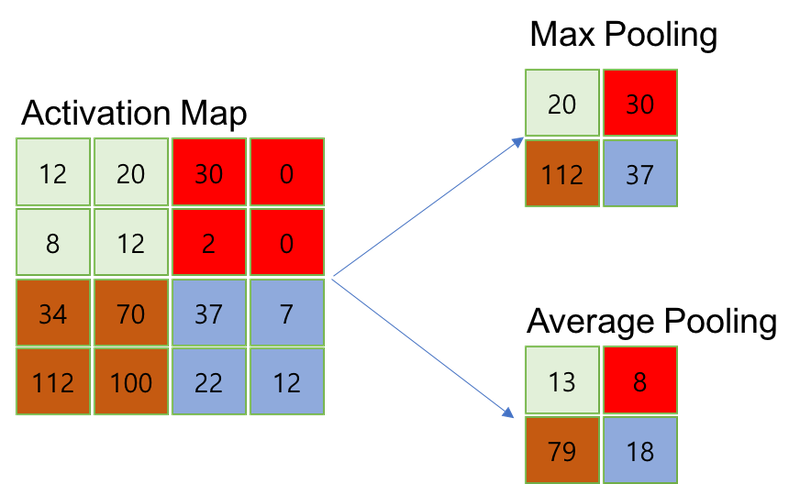
* 일반적으로 이미지 분류에서는 여러 CNN 레이어를 거쳐 우선 특성을 추출하고, 그 특성 맵을 flattening한 후 fully connected layer에 입력해 줌으로써 각 클래스에 따른 logit을 구하고 최종적으로 활성화 함수를 거치게 한다.
* GAP는 분류 모델의 마지막 부분에서 fully connected layer 대신 GAP를 사용한다.
* 매 채널별로, average pooling을 채널의 값 전체에 global하게 적용하게 된다.
* 마지막 CNN 레이어의 채널 수는 데이터의 클래스 수에 맞춰 각 클래스에 따른 확률을 얻을 수 있도록 한다.
* 특성 맵의 각 채널이 클래스별 신뢰도를 나타내게 되어 해석이 쉬울 뿐 아니라 fully connected layer와 달리 최적화할 파라미터가 존재하지 않으므로 과적합(overfitting)을 방지할 수 있다고 한다.
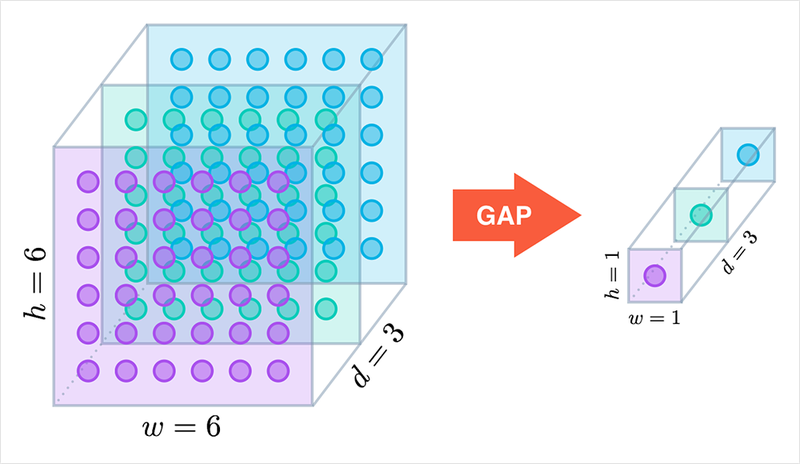

## CAM : Class Activation Map
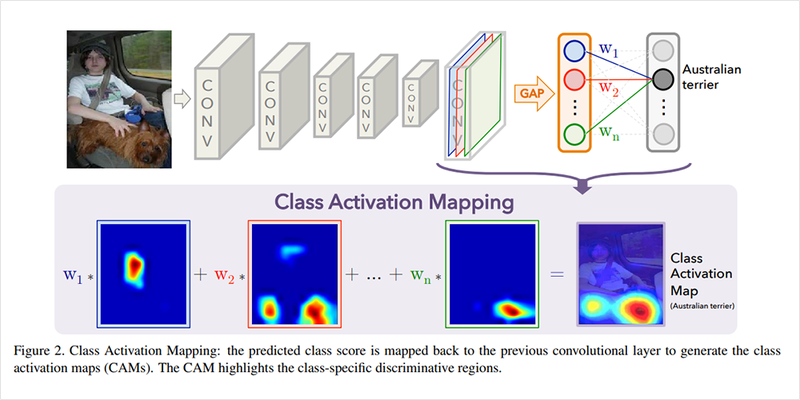
* 모델이 어떤 곳을 보고 어떤 클래스임을 짐작하고 있는지 확인할 수 있는 지도이다.
* 일반적인 CNN은 커널 윈도우에 따라서 특성을 추출하므로 CNN 레이어를 거친 특성 맵에도 입력값의 위치정보가 유지된다.
* 특성 맵의 정보를 이미지 검출(detection)이나 세그멘테이션(Segmentation) 등의 문제를 푸는 데 이용하기도 한다.
* 먼저 CNN 레이어를 거쳐 뽑아낸 특성 맵에 대해서 GAP를 적용하고 이에 대해서 소프트맥스 레이어(소프트맥스 활성화 함수를 가지고 bias가 없는 fully connected layer)를 적용한다.
* 클래스별로 소프트맥스 레이어를 통해 각 채널의 가중합을 구하면 각 클래스가 활성화 맵의 어떤 부분을 주로 활성화시키는지 확인할 수 있다.
* 장 마지막 CNN 레이어의 결과물만을 시각화할 수 있다.
* 이렇게 얻은 특성 맵은 CNN의 출력값 크기와 같게 되는데 이를 보간을 통해 적절히 원본 이미지 크기로 확대하면 CAM을 얻게 된다.

## Grad-CAM
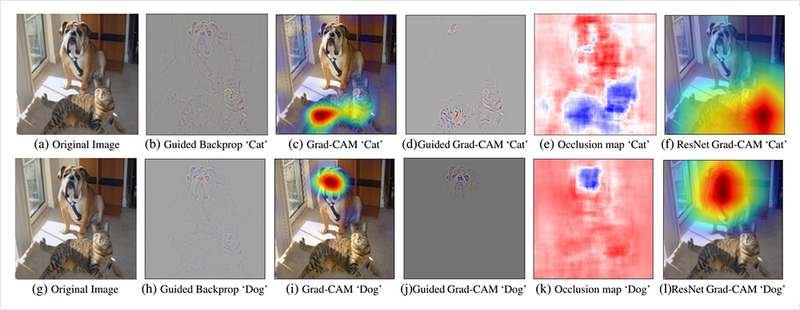
* Grad-CAM(Gradient CAM)은 CAM의 모델의 구조가 제한되는 문제를 해결하고, 다양한 모델의 구조를 해석할 수 있는 방법을 제안한다.
* CNN 기반의 네트워크는 굳이 모델 구조를 변경할 필요가 없으며, 분류 문제 외의 다른 태스크들에 유연하게 대처할 수 있다.
* Gradient를 사용해 CAM을 얻는다.
* 원하는 클래스에 대해서 관찰하는 레이어로 들어오는 Gradient를 구할 수 있다면, 해당 클래스를 활성화할 때, 레이어의 특성 맵에서 어떤 채널이 중요하게 작용하는지 알 수 있다.
* k개의 채널을 가진 활성화 맵에서 각 채널이 어떤 클래스를 활성화하는 데 얼마나 중요하게 작용하는지 가중치 점수를 구할 수 있는데, 이 가중치를 구하려고 CAM처럼 따로 weight 파라미터를 도입할 필요가 없다.
* 활성화 맵에서 어떤 클래스의 위치에 따른 활성화를 보기 위해 k번째 활성화 맵과 이 가중치를 곱해주어 합한 뒤 ReLU 활성화 함수(불필요한 음의 값을 줄여 준다)를 통해 클래스에 따른 Grad-CAM을 얻는다.
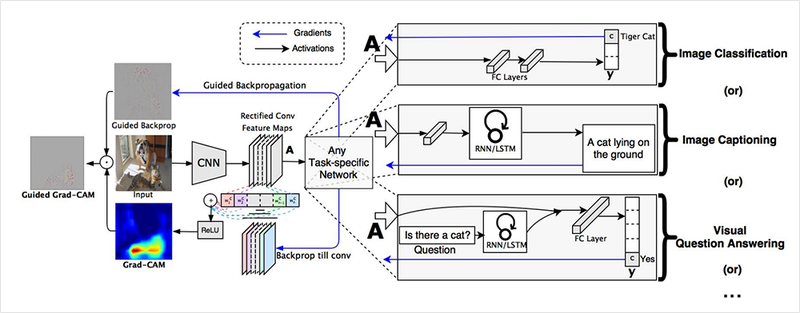

## 약지도학습(weakly supervised learning)
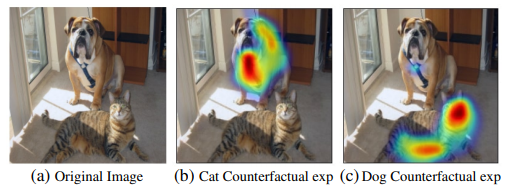
* 직접적으로 정답 위치 정보를 주지 않아도 간접적인 정보를 활용하여 학습하고 원하는 정보를 얻어낼 수 있도록 모델을 학습하는 방식을 약지도학습(weakly supervised learning)이라고 한다.
* CAM, Grad-CAM, ACoL은 약지도학습 기법을 활용해 물체 검출(object detection)을 수행할 수 있다.
* incomplete supervision : 학습 데이터 중 일부에만 라벨이 달린 경우. 일반적으로 말하는 준지도학습과 같은 경우이다.
* inexact supervision : 학습 데이터의 라벨이 충분히 정확하게 달려있지 않은 경우
* inaccurate supervision : 학습 데이터에 Noise가 있는 경우
* 약지도학습이란 위 3가지 경우를 포괄적으로 일컫도록 사용되곤 하지만, 오늘 우리가 다루고자 하는 것은 바로 inexact supervision에 해당하는 경우이다.
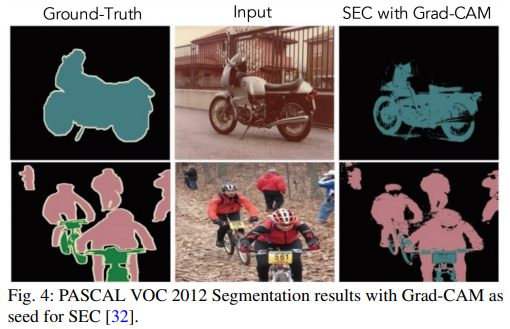

## ACoL : Adversarial Complementary Learning
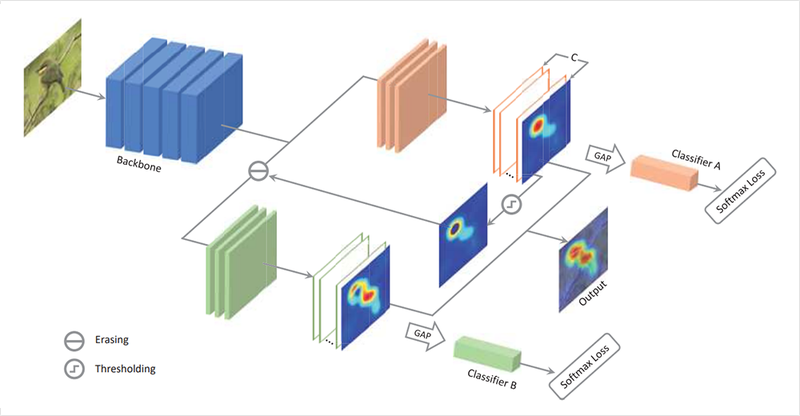
* 물체 검출(Object detection)은 새의 부리나 동물의 눈, 시계의 숫자와 같이 부분적 특성이 아닌 물체의 전체적인 형태와 윤곽을 정확하게 구분해 내는 것이 중요하다.
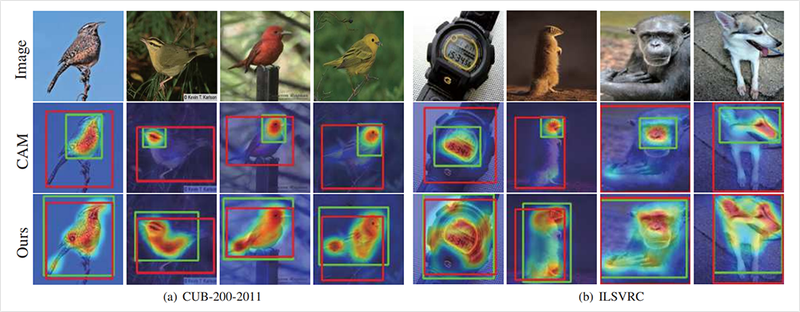
* CAM 모델이 특정 부위에 집중해 학습하는 것을 막기 위해서 ACoL은 브랜치를 두 가지로 두어 너무 높은 점수를 지워줌으로써 주변의 특성 또한 반영하도록 한다.
* 이러한 과정을 Adversarial, 즉, 적대적인 학습방법이라고 한다.